##### Importing Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import *
import seaborn as sns
import numpy as np
import re
from sklearn import preprocessing
from category_encoders.count import CountEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC   
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [2]:
#pip install category_encoders

##### Reading Dataset

In [3]:
bank = pd.read_csv('bank.csv')
bank

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"30;""unemployed"";""married"";""primary"";""no"";1787;..."
1,"33;""services"";""married"";""secondary"";""no"";4789;..."
2,"35;""management"";""single"";""tertiary"";""no"";1350;..."
3,"30;""management"";""married"";""tertiary"";""no"";1476..."
4,"59;""blue-collar"";""married"";""secondary"";""no"";0;..."
...,...
4516,"33;""services"";""married"";""secondary"";""no"";-333;..."
4517,"57;""self-employed"";""married"";""tertiary"";""yes"";..."
4518,"57;""technician"";""married"";""secondary"";""no"";295..."
4519,"28;""blue-collar"";""married"";""secondary"";""no"";11..."


## Pre-processing 

In [4]:
# Creating list of column names in colmns variable

colmns = re.sub(";", " ", bank.columns[0])
colmns = re.sub("\"", "", colmns)
colmns = colmns.split()

# Cleaning each row of data 

def clean_data(row):
    row = re.sub(";", " ", row)
    row = re.sub("\"", "", row)
    row = row.split()
    return row

bank1 = bank.copy()
bank1.iloc[:,0] = bank1.iloc[:,0].map(lambda x: clean_data(x))
bank1

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"[30, unemployed, married, primary, no, 1787, n..."
1,"[33, services, married, secondary, no, 4789, y..."
2,"[35, management, single, tertiary, no, 1350, y..."
3,"[30, management, married, tertiary, no, 1476, ..."
4,"[59, blue-collar, married, secondary, no, 0, y..."
...,...
4516,"[33, services, married, secondary, no, -333, y..."
4517,"[57, self-employed, married, tertiary, yes, -3..."
4518,"[57, technician, married, secondary, no, 295, ..."
4519,"[28, blue-collar, married, secondary, no, 1137..."


In [5]:
# Creating columns from "columns" list which we created above and filling values from row lists

idx = 0
for row in bank1.iloc[:,0]:
    if len(row) == 17:
        i = 0
        for col in colmns:
            bank1.loc[idx,col] = row[i]
            i += 1
    idx += 1
    
bank1.drop(bank1.columns[0], axis=1, inplace=True)
bank2 = bank1.copy()
bank2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [6]:
bank2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   object
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   object
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   object
 10  month      4521 non-null   object
 11  duration   4521 non-null   object
 12  campaign   4521 non-null   object
 13  pdays      4521 non-null   object
 14  previous   4521 non-null   object
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: object(17)
memory usage: 600.6+ KB


In [7]:
bank2.shape

(4521, 17)

In [8]:
bank2['job'].value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

In [9]:
bank2['housing'].value_counts()

yes    2559
no     1962
Name: housing, dtype: int64

In [10]:
bank2['loan'].value_counts()

no     3830
yes     691
Name: loan, dtype: int64

In [11]:
bank2['contact'].value_counts()

cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64

In [12]:
bank2['day'].value_counts()

20    257
18    226
19    201
21    198
14    195
17    191
7     190
6     187
28    181
5     181
8     180
29    175
15    174
30    168
13    166
16    164
9     163
11    152
12    151
4     139
2     114
27    113
26    110
3     105
23    102
22     86
25     80
31     59
10     50
24     36
1      27
Name: day, dtype: int64

##### Converting some columns to int

In [13]:
bank2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   object
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   object
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   object
 10  month      4521 non-null   object
 11  duration   4521 non-null   object
 12  campaign   4521 non-null   object
 13  pdays      4521 non-null   object
 14  previous   4521 non-null   object
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: object(17)
memory usage: 600.6+ KB


In [14]:
bank2[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']] = bank2[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']].astype(int) 

In [15]:
bank2.dtypes

age           int32
job          object
marital      object
education    object
default      object
balance       int32
housing      object
loan         object
contact      object
day           int32
month        object
duration      int32
campaign      int32
pdays         int32
previous      int32
poutcome     object
y            object
dtype: object

In [16]:
bank2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


##### Working missing values

<AxesSubplot:>

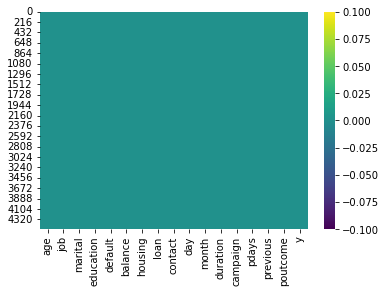

In [17]:
# Visualizing missing values
sns.heatmap(bank2.isnull(), cbar = "True", cmap = 'viridis')

In [18]:
# Checking for any missing values

bank2.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

##### Checking for duplicate values 

In [19]:
bank2.duplicated().sum()

0

In [20]:
bank2.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [21]:
bank2.loc[bank2['balance'] == 71188.000000] 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3700,60,retired,married,primary,no,71188,no,no,cellular,6,oct,205,1,-1,0,unknown,no


In [22]:
bank2.loc[bank2['duration'] == 3025.000000] 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
568,59,unemployed,married,primary,no,0,no,no,cellular,30,jan,3025,2,-1,0,unknown,no


In [23]:
bank2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


##### Encoding techniques

In [24]:
# Using label encoding

bank2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [25]:
bank2.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [26]:
label_encoder = preprocessing.LabelEncoder()
#bank2[['default', 'housing', 'loan', 'y']] = label_encoder.fit_transform(bank2[['default', 'housing', 'loan', 'y']])
bank2['default'] = label_encoder.fit_transform(bank2['default'])
bank2['housing'] = label_encoder.fit_transform(bank2['housing'])
bank2['loan'] = label_encoder.fit_transform(bank2['loan'])
bank2['y'] = label_encoder.fit_transform(bank2['y'])
bank2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0


In [27]:
# Using counter encoding

bank3 = bank2[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']]

In [28]:
#categorical_cols.remove("month")
#bank3.remove("y")
col_to_transform = [col for col in bank3 if col != "y"]

CEnc = CountEncoder(cols=col_to_transform, normalize=True)
transformed_data = CEnc.fit_transform(X=bank3)

transformed_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0.033179,0.028312,0.618668,0.149967,0.98319,0.000442,0.433975,0.847158,0.640566,0.044459,0.017695,0.003097,0.383543,0.819509,0.819509,0.819509,0
1,0.041141,0.092236,0.618668,0.510064,0.98319,0.000221,0.566025,0.152842,0.640566,0.033621,0.309224,0.003318,0.383543,0.000664,0.017253,0.108383,0
2,0.039814,0.214333,0.264543,0.298607,0.98319,0.000221,0.566025,0.847158,0.640566,0.036275,0.064809,0.003981,0.383543,0.001106,0.063260,0.108383,0
3,0.033179,0.214333,0.618668,0.298607,0.98319,0.000221,0.566025,0.152842,0.292856,0.023225,0.117452,0.002654,0.071887,0.819509,0.819509,0.819509,0
4,0.015704,0.209246,0.618668,0.510064,0.98319,0.078965,0.566025,0.847158,0.292856,0.040035,0.309224,0.002212,0.383543,0.819509,0.819509,0.819509,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,0.041141,0.092236,0.618668,0.510064,0.98319,0.000221,0.566025,0.847158,0.640566,0.037160,0.156160,0.000885,0.036939,0.819509,0.819509,0.819509,0
4517,0.020128,0.040478,0.618668,0.298607,0.01681,0.000221,0.566025,0.152842,0.292856,0.036054,0.309224,0.002654,0.383543,0.819509,0.819509,0.819509,0
4518,0.020128,0.169874,0.618668,0.510064,0.98319,0.000885,0.433975,0.847158,0.640566,0.044459,0.140013,0.004203,0.004866,0.819509,0.819509,0.819509,0
4519,0.022783,0.209246,0.618668,0.510064,0.98319,0.000221,0.433975,0.847158,0.640566,0.041363,0.049104,0.003318,0.071887,0.000442,0.024994,0.043574,0


##### Working with outliers`

In [29]:
# Outlier detection for numerical data

cols = bank2.select_dtypes(exclude='object').columns.tolist()

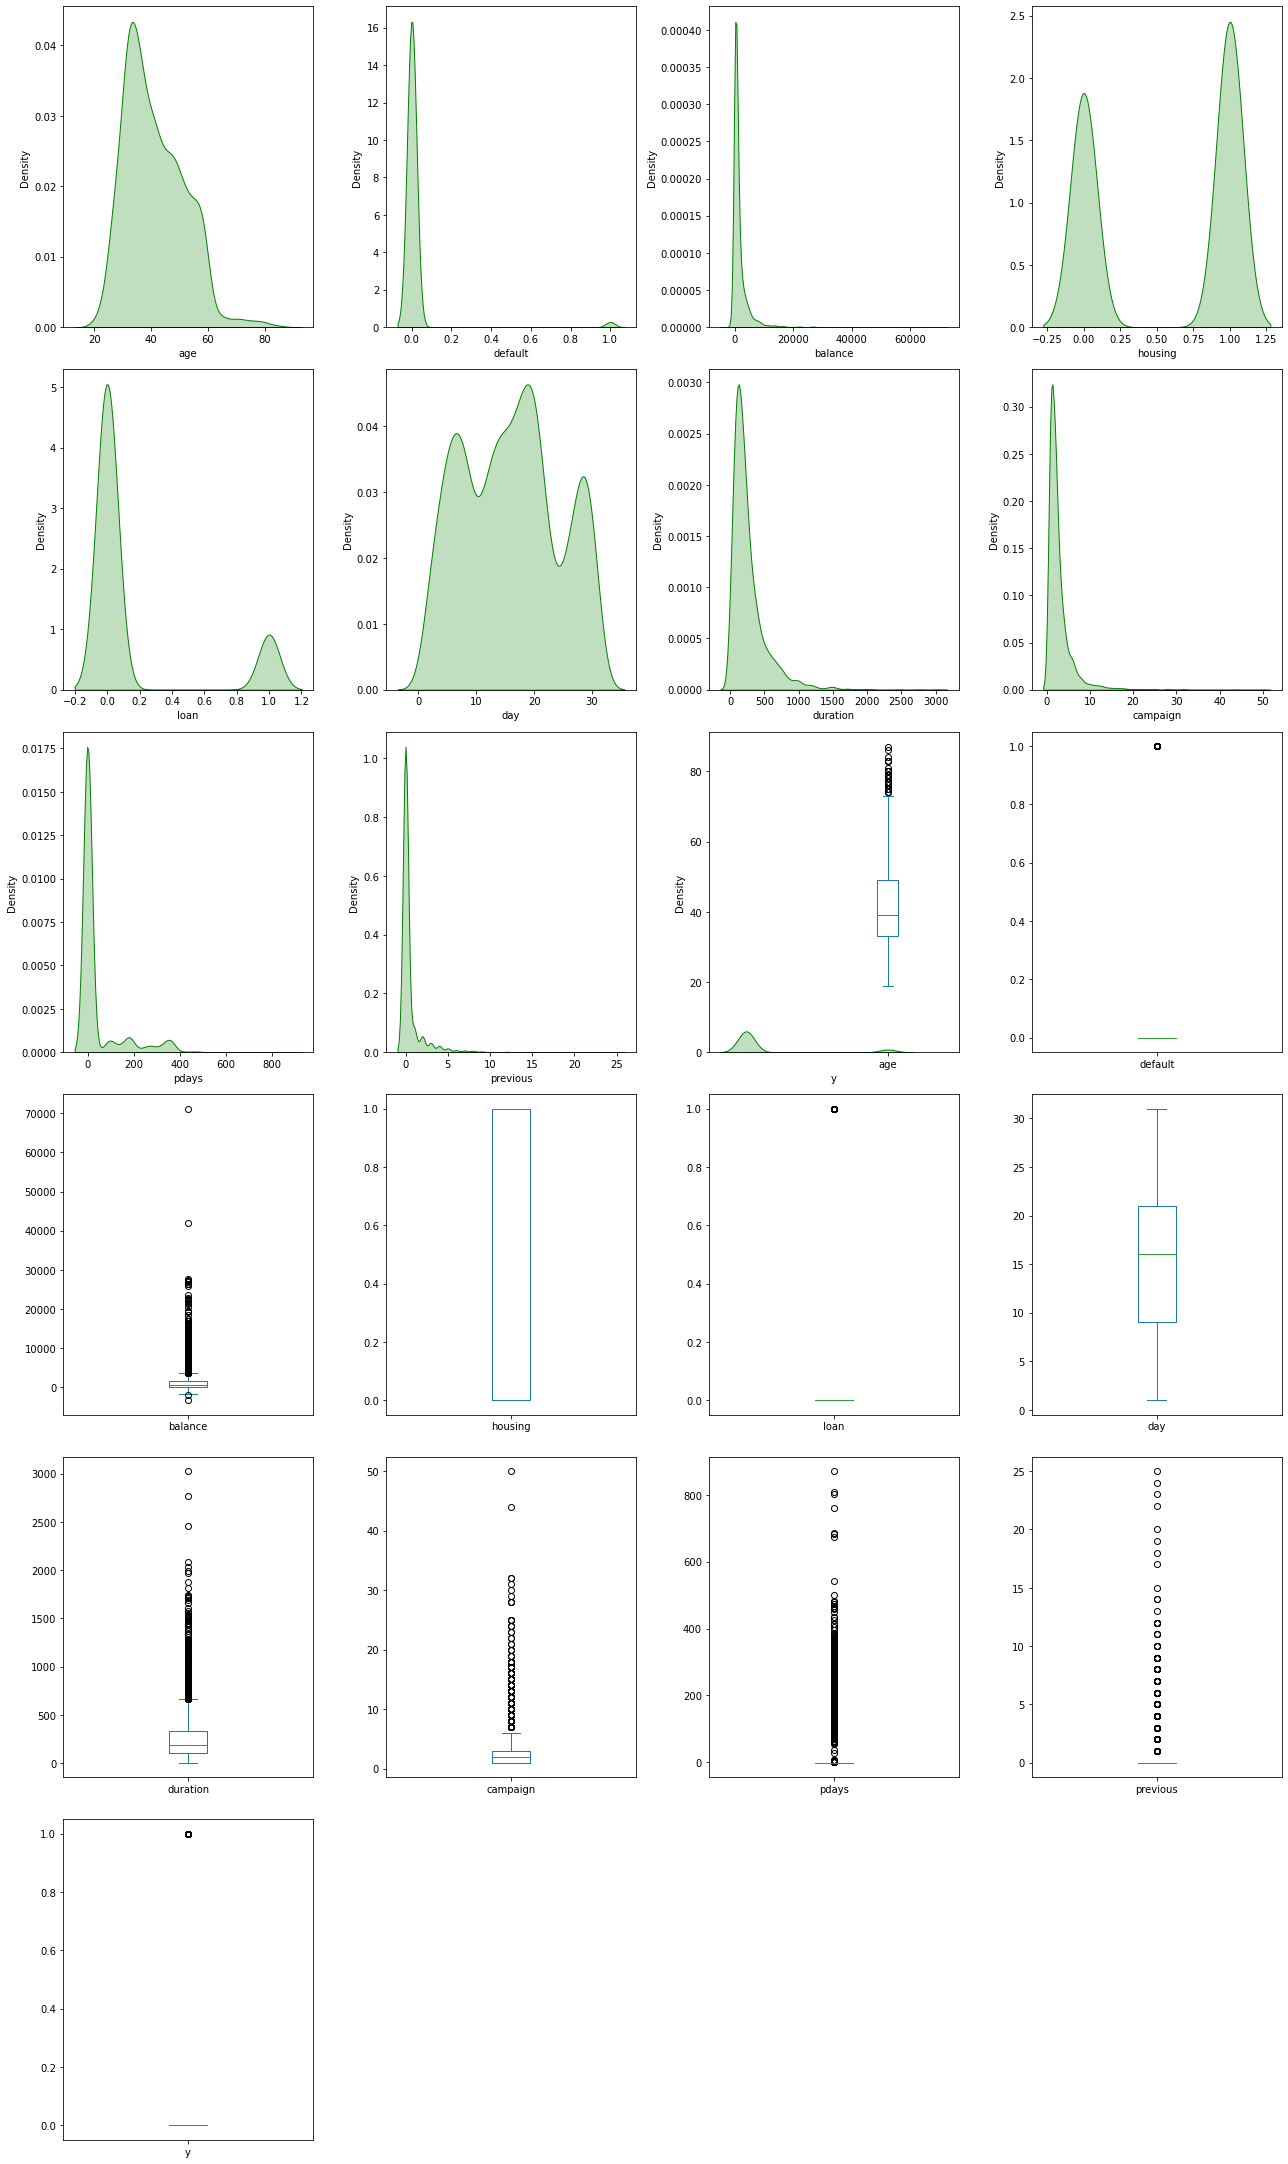

In [30]:
plt.figure(figsize=(18,40))
for i,col in enumerate(cols,1):
    plt.subplot(8,4,i)
    sns.kdeplot(bank2[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    bank2[col].plot.box()
plt.tight_layout() 
plt.show()

In [31]:
# Removing outlier values 

bank2.drop(bank2[(bank2['balance'] >30000)].index, inplace=True)
bank2.drop(bank2[(bank2['loan'] >0.9)].index, inplace=True)
bank2.drop(bank2[(bank2['campaign'] >40)].index, inplace=True)
bank2.drop(bank2[(bank2['pdays'] >600)].index, inplace=True)

In [32]:
bank2.shape

(3822, 17)

##### Some basic visualizations

<AxesSubplot:xlabel='age', ylabel='balance'>

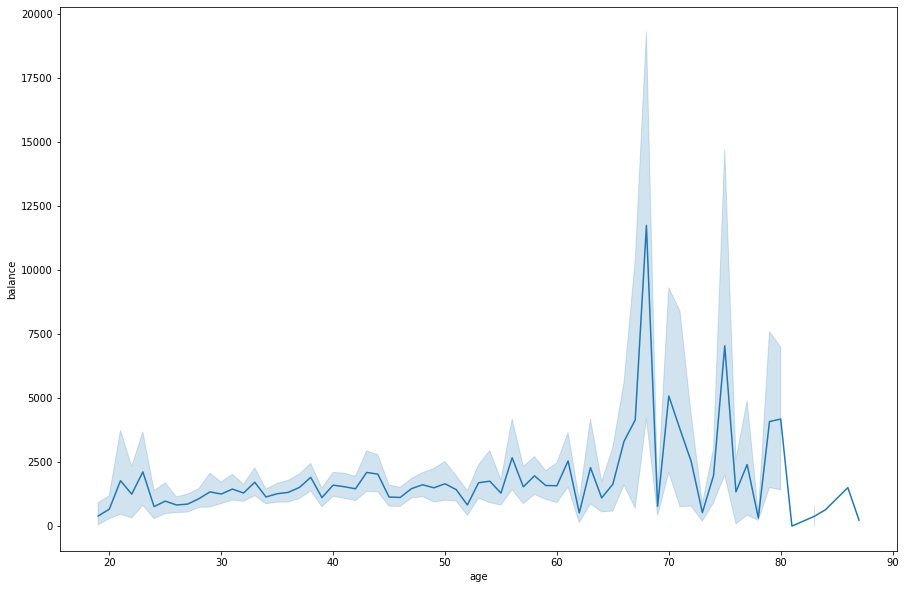

In [33]:
fig, ax = plt.subplots(figsize = (15,10))
sns.lineplot(x = "age", y = "balance", data = bank2, ax=ax )

In [34]:
highest_balance = bank2[['job', 'balance']].sort_values(by = 'balance', ascending=False)[:5]
highest_balance

,job,balance
1483,technician,27733
1881,management,27359
871,housemaid,26965
4047,retired,26452
3011,services,26394


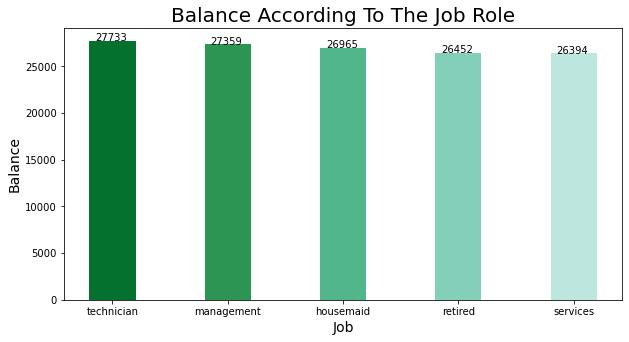

In [35]:
fig = plt.figure(figsize = (10, 5))
plt.bar(highest_balance['job'],  highest_balance['balance'], color=sns.color_palette("BuGn_r"), width = 0.4)
plt.title('Balance According To The Job Role',fontsize=20)
plt.xlabel('Job',fontsize=14)
plt.ylabel('Balance',fontsize=14)
xlocs, xlabs = plt.xticks()
for i, v in enumerate(highest_balance['balance']):
    plt.text(xlocs[i] - 0.15, v + 0.10, str(v))

In [36]:
loan_check = bank2[['marital']].sort_values('marital', ascending = False).value_counts()
loan_check

marital 
married     2338
single      1047
divorced     437
dtype: int64

C:\Users\dhava\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


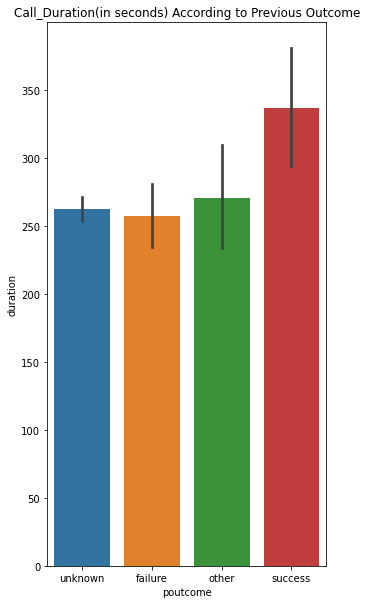

In [37]:
plt.figure(figsize=[5,10])
sns.barplot(bank2['poutcome'],bank2['duration'])
plt.title('Call_Duration(in seconds) According to Previous Outcome')
plt.show()

## Model Building

In [38]:
X = transformed_data[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']]
y = transformed_data['y']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

##### Logistic Regression

In [40]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [41]:
y_pred = classifier.predict(X_test)

In [42]:
cm = confusion_matrix(y_test, y_pred)

print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[793   0]
 [112   0]]


In [43]:
'''
Out of 100 : 
True Positive + True Negative = 683 + 0 
False Positive + False Negative = 0 + 82
Performance measure – Accuracy 
'''

'\nOut of 100 : \nTrue Positive + True Negative = 683 + 0 \nFalse Positive + False Negative = 0 + 82\nPerformance measure – Accuracy \n'

In [44]:
from sklearn.metrics import accuracy_score
print ("Accuracy For Logistic Regression : ", accuracy_score(y_pred, y_test))

Accuracy For Logistic Regression :  0.876243093922652


In [45]:
print('Logistic Regression_RMSE:', np.sqrt(metrics.mean_squared_error(y_pred, y_test)))

Logistic Regression_RMSE: 0.351790997720732


##### SVM (Support Vector Machine)

In [46]:
svm = SVC(kernel='rbf')    
svm.fit(X_train, y_train) 

SVC()

In [47]:
y_pred1 = svm.predict(X_test)  

In [48]:
cm = confusion_matrix(y_test, y_pred1)

print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[793   0]
 [112   0]]


In [49]:
from sklearn import metrics
print("Accuracy For SVM : ", metrics.accuracy_score(y_pred1, y_test))

Accuracy For SVM :  0.876243093922652


In [50]:
print('SVM_RMSE:', np.sqrt(metrics.mean_squared_error(y_pred1, y_test)))

SVM_RMSE: 0.351790997720732


##### Random Forest

In [51]:
num_trees = 100
max_features = 10  

In [52]:
rf = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
rf.fit(X_train, y_train) 

RandomForestClassifier(max_features=10)

In [53]:
y_pred2 = rf.predict(X_test)  

In [54]:
cm = confusion_matrix(y_test, y_pred2)

print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[770  23]
 [ 85  27]]


In [55]:
from sklearn import metrics
print("Accuracy For Random Forest : ", metrics.accuracy_score(y_pred2, y_test))

Accuracy For Random Forest :  0.8806629834254144


In [56]:
print('Random Forest_RMSE:', np.sqrt(metrics.mean_squared_error(y_pred2, y_test)))

Random Forest_RMSE: 0.3454519019698482


##### AdaBoost

In [57]:
parameters = {"n_estimators":[70,80,90,100,110],
              "learning_rate":[0.05,0.07,0.1,0.15,0.2]}

Ada = AdaBoostClassifier()
Grid_Ada = GridSearchCV(estimator=Ada, param_grid=parameters, cv=4)
Grid_Ada.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.05, 0.07, 0.1, 0.15, 0.2],
                         'n_estimators': [70, 80, 90, 100, 110]})

In [58]:
y_pred3 = Grid_Ada.predict(X_test)

In [59]:
cm = confusion_matrix(y_test, y_pred3)

print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[786   7]
 [ 98  14]]


In [60]:
from sklearn import metrics
print("Accuracy For Adaboost : ", metrics.accuracy_score(y_pred3, y_test))

Accuracy For Adaboost :  0.8839779005524862


In [61]:
print('AdaBoost_RMSE:', np.sqrt(metrics.mean_squared_error(y_pred3, y_test)))

AdaBoost_RMSE: 0.34062016887952157


In [62]:
print ("Accuracy For Logistic Regression             : ", accuracy_score(y_pred, y_test))
print("Accuracy For SVM                             : ", metrics.accuracy_score(y_pred1, y_test))
print("Accuracy For Random Forest                   : ", metrics.accuracy_score(y_pred2, y_test))
print("Accuracy For Adaboost                        : ", metrics.accuracy_score(y_pred3, y_test))

Accuracy For Logistic Regression             :  0.876243093922652
Accuracy For SVM                             :  0.876243093922652
Accuracy For Random Forest                   :  0.8806629834254144
Accuracy For Adaboost                        :  0.8839779005524862


In [63]:
print('Logistic Regression_RMSE                :', np.sqrt(metrics.mean_squared_error(y_pred, y_test)))
print('SVM_RMSE                                :', np.sqrt(metrics.mean_squared_error(y_pred1, y_test)))
print('Random Forest_RMSE                      :', np.sqrt(metrics.mean_squared_error(y_pred2, y_test)))
print('AdaBoost_RMSE                           :', np.sqrt(metrics.mean_squared_error(y_pred3, y_test)))

Logistic Regression_RMSE                : 0.351790997720732
SVM_RMSE                                : 0.351790997720732
Random Forest_RMSE                      : 0.3454519019698482
AdaBoost_RMSE                           : 0.34062016887952157
